## 0. 세팅 설치

In [1]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 8.53 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 8.2 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2024-07-17 05:29:54--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.142.24, 104.192.142.26, 104.192.142.25, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.24|:443... connected.
HTTP request sent, awaitin

In [2]:
# 위의 코드가 작동하지 않을 때 대안 코드 1 실행
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 3.4 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1232 sha256=7747cc4d6416ae074cce258d70a600ba06aa97e33f05a9e3c453dcbf52b750a7
  Stored in directory: /root/.cache/pip/wheels/ec/41/c8/ce8fb469be2547ce596c4000613806505dc54c296aae45da71
Successfully built mecab-python
mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [3]:
from konlpy.tag import Mecab
mecab = Mecab()
#NameError: name 'Tagger' is not defined 오류 발생 시 런타임을 재실행 해주세요.

## Mecab
: 일본어와 한국어 텍스트 분석에 널리 사용되는 형태소 분석기
-  형태소(어근, 단어, 접사 등)을 식별하고 분리하는 도구

- 빠른 처리 속도 : Mecab은 대량의 텍스트 데이터를 빠르게 분석할 수 있도록 설계
- 정확한 분석 : 다양한 언어규칙을 적용하여 정확한 형태소 분석 수행
- 확장성 : 사용자 정의 사전이나 규칙을 추가하여 특정 도메인에 맞게 확장
- 오픈 소스 : Mecab은 오픈 소수로 제공 되므로 누구나 사용 가능

In [4]:
# 한글 자모 단위 처리 패키지 설치
!pip install hgtk

In [5]:
# fasttext 설치
!git clone https://github.com/facebookresearch/fastText.git
%cd fastText
!make
!pip install .

Cloning into 'fastText'...
remote: Enumerating objects: 3998, done.
remote: Counting objects: 100% (1057/1057), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 3998 (delta 922), reused 884 (delta 856), pack-reused 2941
Receiving objects: 100% (3998/3998), 8.30 MiB | 16.09 MiB/s, done.
Resolving deltas: 100% (2529/2529), done.
/content/Mecab-ko-for-Google-Colab/fastText
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/args.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/autotune.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/matrix.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/dictionary.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/loss.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/productquantizer.cc
c++ -pthread -std=c++17 -march=native -O3 -funroll-loops -DNDEBUG -c src/densematrix.cc
c++ -pt

In [6]:
#hgtk 설치
!pip install hgtk

## 1. 데이터 로드

In [7]:
import re
import pandas as pd
import urllib.request
from tqdm import tqdm
import hgtk

In [8]:
# 네이버 쇼핑 리뷰
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7e8e15d520e0>)

In [9]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 200000


In [10]:
total_data.head()

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


## 2. 자음 모음 분류기 hgtk 튜토리얼

- word embedding: 단어 단위의 임베딩
- character embedding : 문자 단위 임베딩

- hgtk : 한국어를 character embedding할 수 있는 것.

> 영어는 하나의 알파벳(52자)를 기준으로 character embedding을 하지만 한국어에서는 하나의 음절로 하게 되면 11172개의 음절이 있기 때문에 계산량이 너무 많다.
따라서 그보다 작은 단위인 자음, 모음으로 분리!

> 참고 repo: https://github.com/bluedisk/hangul-toolkit

In [11]:
# 한글인지 체크
print(hgtk.checker.is_hangul('ㄱ'))
print(hgtk.checker.is_hangul('12'))
print(hgtk.checker.is_hangul('a'))

True
False
False


In [12]:
# 음절을 초성, 중성, 종성으로 분해
print(hgtk.letter.decompose('남'))
# 초성, 중성, 종성을 하나의 음절로 결합
print(hgtk.letter.compose('ㄴ', 'ㅏ', 'ㅁ'))

('ㄴ', 'ㅏ', 'ㅁ')
남


In [13]:
# 결합할 수 없는 상황에서는 에러 발생
try:
  hgtk.letter.compose('ㄴ', 'ㅁ', 'ㅁ') # 중성이 없는 경우
except:
  print('에러 발생')

에러 발생


## 3. 데이터 전처리

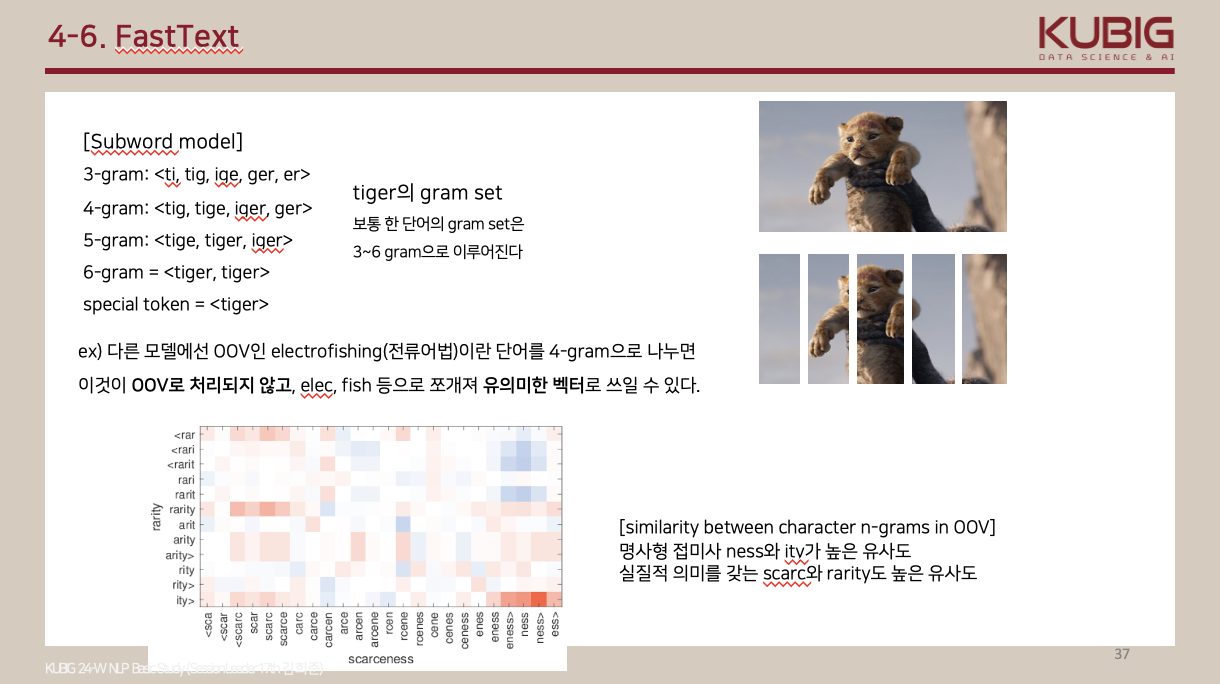


`fasttext` : subword 단위로 임베딩 벡터를 생성하는 도구

- 한국어에서 subword는 자음 모음 단위로 생각할 수 있다.
- fasttext에 학습시킬 데이터를 만들기 위해 앞서 로드한 네이버 쇼핑 리뷰들을 hgtk를 활용해 자음 모음 단위로 전처리해보기.

In [14]:
def word_to_jamo(token):
  def to_special_token(jamo): # 경우에 따라 초, 중, 종성이 다 있는 게 아닌 경우도 있다. 이 경우 -를 반환해주는 함수
    if not jamo:
      return '-'
    else:
      return jamo

  decomposed_token = ''
  for char in token:
    try:
      # char(음절)을 초성, 중성, 종성으로 분리
      cho, jung, jong = hgtk.letter.decompose(char)

      # 자모가 빈 문자일 경우 특수문자 -로 대체
      cho = to_special_token(cho)
      jung = to_special_token(jung)
      jong = to_special_token(jong)
      decomposed_token = decomposed_token + cho + jung + jong

    # 만약 char(음절)이 한글이 아닐 경우 자모를 나누지 않고 추가
    except Exception as exception:
      if type(exception).__name__ == 'NotHangulException':
        decomposed_token += char

  # 단어 토큰의 자모 단위 분리 결과를 추가
  return decomposed_token

In [15]:
print(word_to_jamo('남동생'))
print(word_to_jamo('야구')) # 야구의 경우 종성이 없으므로 종성 부분을 -로 반환

ㄴㅏㅁㄷㅗㅇㅅㅐㅇ
ㅇㅑ-ㄱㅜ-


## Mecab에서 morphs 메서드
- 주어진 문장을 형태소 단위로 분리하여 반환하는 기능
- 형태소는 언어의 최소 의미 단위
- 텍스트를 작은 단위로 나눠준다.

In [16]:
print(mecab.morphs('선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다.'))

['선물', '용', '으로', '빨리', '받', '아서', '전달', '했어야', '하', '는', '상품', '이', '었', '는데', '머그', '컵', '만', '와서', '당황', '했', '습니다', '.']


In [17]:
# mecab으로 형태소를 분리해주고 그 형태소마다 각각 자음모음을 분리해주는 함수
def tokenize_by_jamo(s):
    return [word_to_jamo(token) for token in mecab.morphs(s)]

In [18]:
print(tokenize_by_jamo('선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다.'))

['ㅅㅓㄴㅁㅜㄹ', 'ㅇㅛㅇ', 'ㅇㅡ-ㄹㅗ-', 'ㅃㅏㄹㄹㅣ-', 'ㅂㅏㄷ', 'ㅇㅏ-ㅅㅓ-', 'ㅈㅓㄴㄷㅏㄹ', 'ㅎㅐㅆㅇㅓ-ㅇㅑ-', 'ㅎㅏ-', 'ㄴㅡㄴ', 'ㅅㅏㅇㅍㅜㅁ', 'ㅇㅣ-', 'ㅇㅓㅆ', 'ㄴㅡㄴㄷㅔ-', 'ㅁㅓ-ㄱㅡ-', 'ㅋㅓㅂ', 'ㅁㅏㄴ', 'ㅇㅘ-ㅅㅓ-', 'ㄷㅏㅇㅎㅘㅇ', 'ㅎㅐㅆ', 'ㅅㅡㅂㄴㅣ-ㄷㅏ-', '.']


In [19]:
# 리뷰 데이터의 reviews 컬럼만을 가져와서 자모 분리
tokenized_data = []

for sample in tqdm(total_data['reviews'].to_numpy()):
    tokenzied_sample = tokenize_by_jamo(sample) # 자소 단위 토큰화
    tokenized_data.append(tokenzied_sample)

100%|██████████| 200000/200000 [01:12<00:00, 2756.55it/s]


In [20]:
print(len(tokenized_data))
print("전처리 전:", total_data['reviews'][1])
print("전처리 후:", tokenized_data[1])

200000
전처리 전: 택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
전처리 후: ['ㅌㅐㄱㅂㅐ-', 'ㄱㅏ-', 'ㅇㅓㅇㅁㅏㅇ', 'ㅇㅣ-', 'ㄴㅔ-', 'ㅇㅛㅇ', 'ㅈㅓ-ㅎㅢ-', 'ㅈㅣㅂ', 'ㅁㅣㅌ', 'ㅇㅔ-', 'ㅊㅡㅇ', 'ㅇㅔ-', 'ㅁㅏㄹ', 'ㄷㅗ-', 'ㅇㅓㅄㅇㅣ-', 'ㄴㅘ-ㄷㅜ-', 'ㄱㅗ-', 'ㄱㅏ-', 'ㄱㅗ-']


위 : 단어를 자모 분리
아래 : 자모 분리한 단어를 다시 결합하는 함수 정의

단어의 코사인 유사도를 평가할 때 자모 분리가 된 상태가 아니라 단어 상태로 편리하게 보기 위함!

In [21]:
def jamo_to_word(jamo_sequence):
  tokenized_jamo = []
  index = 0

  # 1. 초기 입력
  # jamo_sequence = 'ㄴㅏㅁㄷㅗㅇㅅㅐㅇ' >> 예시인것.

  while index < len(jamo_sequence):
    # 문자가 한글(정상적인 자모)이 아닐 경우
    if not hgtk.checker.is_hangul(jamo_sequence[index]):
      tokenized_jamo.append(jamo_sequence[index])
      index = index + 1

    # 문자가 정상적인 자모라면 초성, 중성, 종성을 하나의 토큰으로 간주.
    else:
      tokenized_jamo.append(jamo_sequence[index:index + 3])
      index = index + 3

  # 2. 자모 단위 토큰화 완료
  # tokenized_jamo : ['ㄴㅏㅁ', 'ㄷㅗㅇ', 'ㅅㅐㅇ']

  word = ''
  try:
    for jamo in tokenized_jamo:

      # 초성, 중성, 종성의 묶음으로 추정되는 경우
      if len(jamo) == 3:
        if jamo[2] == "-":
          # 종성이 존재하지 않는 경우
          word = word + hgtk.letter.compose(jamo[0], jamo[1])
        else:
          # 종성이 존재하는 경우
          word = word + hgtk.letter.compose(jamo[0], jamo[1], jamo[2])
      # 한글이 아닌 경우
      else:
        word = word + jamo

  # 복원 중(hgtk.letter.compose) 에러 발생 시 초기 입력 리턴.
  # 복원이 불가능한 경우 예시) 'ㄴ!ㅁㄷㅗㅇㅅㅐㅇ'
  except Exception as exception:
    if type(exception).__name__ == 'NotHangulException':
      return jamo_sequence

  # 3. 단어로 복원 완료
  # word : '남동생'

  return word

## 4. FastText

In [22]:
import fasttext

- fasttext 실행 조건 : 훈련 대상인 단어들을 txt 파일로 준비!
- tokenized_data.txt라는 파일을 쓰기 모드(w)로 생성해 > 전처리한 tokenized_data를 입력해줍니다.

In [23]:
with open('tokenized_data.txt', 'w') as out:
  for line in tqdm(tokenized_data, unit=' line'):
    out.write(' '.join(line) + '\n')

100%|██████████| 200000/200000 [00:00<00:00, 345327.87 line/s]


`train_unsupervised`함수 : 훈련을 시켜주는 함수
인자로 훈련할 단어가 담긴 txt 파일을 지정하고 model을 `cbow`나 `skipgram`중에 하나 고르기

In [24]:
model = fasttext.train_unsupervised('tokenized_data.txt', model='cbow')

In [25]:
model.save_model("fasttext.bin")

In [26]:
model = fasttext.load_model("fasttext.bin")

In [27]:
model[word_to_jamo('남동생')] # 'ㄴㅏㅁㄷㅗㅇㅅㅐㅇ'

array([ 0.20295912,  0.5707981 ,  0.87103486, -0.64740765, -0.721116  ,
       -0.5641648 ,  0.10146271,  0.85390854, -0.5456046 , -0.41430095,
        0.8333492 ,  0.2350045 , -0.18085924,  0.34131783, -0.34247565,
        0.78674227, -0.16390404,  0.6100172 , -0.277992  ,  0.3902195 ,
        0.64068687, -0.49268013,  0.6862785 ,  0.07155326, -0.21830972,
       -0.5116173 ,  0.32844183,  1.0813764 ,  1.0825198 , -0.80955577,
        0.66879433, -0.5742476 ,  0.17960289, -0.5709652 ,  1.5118197 ,
       -0.29883206, -0.39651895, -0.26127824, -0.3670981 ,  0.10454486,
        0.3970291 , -0.19859193,  0.25625739,  0.14890097, -0.51591456,
       -0.69053787,  0.21894707,  0.08781137,  0.5961313 , -0.41897762,
       -0.30249965,  0.07722719,  0.5382935 ,  0.1638045 , -1.3388832 ,
        0.12875223,  0.1894972 ,  0.46559703, -0.63404   , -0.14937605,
       -0.11920847, -0.75148463, -0.09191727,  0.74194956,  0.13941965,
        0.0158555 , -0.09262516,  0.09673674, -0.21654429, -0.18

CBOW 모델에 의해서 모델이 자모 단위의 벡터를 학습하고 있고 그래서 변환된 자모로 벡터를 추출할 수 있다. 이를 통해 모델이 한글 텍스트의 자모 단위 패턴을 이해한다.


`get_nearest_neighbors` 함수를 사용 :  '남동생'이라는 단어와 가장 유사도가 높은 단어들(자모 분리된 상태)을 k개만큼 출력

In [28]:
model.get_nearest_neighbors(word_to_jamo('남동생'), k=10)

[(0.8829301595687866, 'ㄷㅗㅇㅅㅐㅇ'),
 (0.8267132639884949, 'ㄴㅏㅁㅊㅣㄴ'),
 (0.7790161371231079, 'ㅊㅣㄴㄱㅜ-'),
 (0.7647615671157837, 'ㅅㅐㅇㅇㅣㄹ'),
 (0.7541178464889526, 'ㄴㅏㅁㅍㅕㄴ'),
 (0.7390817999839783, 'ㅈㅗ-ㅋㅏ-'),
 (0.7115105390548706, 'ㄴㅏㅁㅇㅏ-'),
 (0.6959642767906189, 'ㅇㅓㄴㄴㅣ-'),
 (0.6923184990882874, 'ㅅㅓㄴㅁㅜㄹ'),
 (0.6858290433883667, 'ㅈㅜㅇㅎㅏㄱㅅㅐㅇ')]

`jamo_to_word`로 가독성이 좋게 출력

In [29]:
def transform(word_sequence):
  return [(jamo_to_word(word), similarity) for (similarity, word) in word_sequence]

In [30]:
print(transform(model.get_nearest_neighbors(word_to_jamo('남동생'), k=10)))
print(transform(model.get_nearest_neighbors(word_to_jamo('구매'), k=10)))
print(transform(model.get_nearest_neighbors(word_to_jamo('배달'), k=10)))

[('동생', 0.8829301595687866), ('남친', 0.8267132639884949), ('친구', 0.7790161371231079), ('생일', 0.7647615671157837), ('남편', 0.7541178464889526), ('조카', 0.7390817999839783), ('남아', 0.7115105390548706), ('언니', 0.6959642767906189), ('선물', 0.6923184990882874), ('중학생', 0.6858290433883667)]
[('구매처', 0.8550603985786438), ('구입', 0.8218072056770325), ('주문', 0.7623924612998962), ('주문건', 0.7193580865859985), ('주문서', 0.6517313122749329), ('구매자', 0.6285196542739868), ('구명조끼', 0.6010740995407104), ('헤매', 0.5885583758354187), ('수입', 0.5865612626075745), ('구이', 0.583198070526123)]
[('배송지', 0.8130894899368286), ('깨달', 0.7827602624893188), ('매달', 0.7649745345115662), ('택배', 0.7505753636360168), ('배소', 0.7381777167320251), ('직송', 0.7309460639953613), ('백배', 0.7154455184936523), ('메달', 0.7152059674263), ('운송장', 0.7118396162986755), ('송장', 0.704675555229187)]


## 5.Word2Vec

- 자모 단위로 분리하는 것이 아니라 단어 단위로 분리해서 임베팅 벡터를 생성한다.

In [31]:
# 간단하게 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

tokenized_data2 = []
for sentence in tqdm(total_data['reviews'].to_list()):
    tokenized_sentence = mecab.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data2.append(stopwords_removed_sentence)

100%|██████████| 200000/200000 [00:26<00:00, 7530.50it/s]


In [32]:
print("word2vec용 데이터:", tokenized_data2[0])
print("fasttext용 데이터:", tokenized_data[0])

word2vec용 데이터: ['배공', '빠르', '고', '굿']
fasttext용 데이터: ['ㅂㅐ-ㄱㅗㅇ', 'ㅃㅏ-ㄹㅡ-', 'ㄱㅗ-', 'ㄱㅜㅅ']


In [33]:
from gensim.models import Word2Vec

model2 = Word2Vec(sentences = tokenized_data2, vector_size = 1000, window = 5, min_count = 5, workers = 4, sg = 0)

In [34]:
# 완성된 임베딩 매트릭스의 크기 확인
# 단어의 총 개수는 14959개이고 벡터 차원은 1000으로 축소되었다.
model2.wv.vectors.shape

(15005, 1000)

## 6. FastText와 Word2Vec 결과 비교

### Q1) 남동생과 주문 두 단어를 input으로 넣고 결과를 비교한 뒤 해석해보세요
(Hint: 유사도, 단어의 의미, 단어의 생김새 등을 고려해 볼 수 있습니다)

In [35]:
print("FastText 유사도:", transform(model.get_nearest_neighbors(word_to_jamo('남동생'), k=10)))
print("Word2Vec 유사도:", model2.wv.most_similar("남동생"))

FastText 유사도: [('동생', 0.8829301595687866), ('남친', 0.8267132639884949), ('친구', 0.7790161371231079), ('생일', 0.7647615671157837), ('남편', 0.7541178464889526), ('조카', 0.7390817999839783), ('남아', 0.7115105390548706), ('언니', 0.6959642767906189), ('선물', 0.6923184990882874), ('중학생', 0.6858290433883667)]
Word2Vec 유사도: [('앞둔', 0.8366572260856628), ('사촌', 0.8145044445991516), ('친한', 0.7820489406585693), ('기념일', 0.7730007767677307), ('놀이터', 0.7726759910583496), ('셔셔', 0.7684418559074402), ('귀요미', 0.7644526958465576), ('친정아버지', 0.7547478079795837), ('양가', 0.7530199885368347), ('어린이날', 0.7520485520362854)]


In [36]:
print("FastText 유사도:", transform(model.get_nearest_neighbors(word_to_jamo('주문'), k=10)))
print("Word2Vec 유사도:", model2.wv.most_similar("주문"))

FastText 유사도: [('주문건', 0.908315122127533), ('주문서', 0.8571336269378662), ('주문자', 0.7697494626045227), ('구매', 0.7623926401138306), ('구입', 0.7441419363021851), ('주무시', 0.7339511513710022), ('구매처', 0.7279245853424072), ('주무', 0.7061142921447754), ('시켰었', 0.6750567555427551), ('시킨', 0.6609402894973755)]
Word2Vec 유사도: [('구매', 0.8285589218139648), ('구입', 0.8222643136978149), ('선택', 0.6392370462417603), ('시켰', 0.5624157786369324), ('결제', 0.5436710715293884), ('장만', 0.5229077339172363), ('신청', 0.5181114077568054), ('교체', 0.5116491317749023), ('도착', 0.5023968815803528), ('도전', 0.49931156635284424)]


## A)
'남동생'의 단어에서는 Fast text보다는 Word2Vec 가 비교적 성능이 좋아보인다. 남동생과 유사한 단어들을 더 많이 추출한다.

'주문'에 대해서는 FastText 에 대한 성능이 더 좋으며, 단어의 의미와 관련해서도 주문과 관련된 단어가 더 많고 단어의 길이 자체도 꼭 2개로 한정되어 있지 않다.

추가적으로 FastText가 단어 철자와 유사한 구조를 가진 단어들이 많이 추출된다. (예를 들어 남동생은 남편, 남친, 남아 등이 나오고 주문은 주문건, 주문서, 주문자 등과 같이 나와서 유사한 구조를 가진 단어들이 많이 추출된다.)

Word2Vec의 경우는 의미론적으로 유사한 단어들이 많이 추출된다.



### Word2Vec :
- 사용 하는 모델
> CBOW 모델 : 문맥 단어들로부터 중심 단어 예측
> Skip-gram 모델 : 중심 단어로부터 문맥 단어들을 예측

단어 자체를 임베딩 하기 때문에 단어의 의미를 잘 표현할 수 있지만 훈련된 모델에서 본적 없는 단어나 철자 오류가 있는 단어에 대해서는 잘 작동하지 않는다.

### FastText
- Word2Vec의 단점을 보완
- ngrams을 사용하고
OOV 단어를 처리
- 대규모 데이터 셋에서도 빠르게 학습이 가능하다.

### Q2) Fasttext가 Word2Vec보다 항상 성능이 나은지 다양한 input을 넣어서 시도해보세요

In [38]:
print("FastText 유사도:", transform(model.get_nearest_neighbors(word_to_jamo('사과'), k=10)))
print("Word2Vec 유사도:", model2.wv.most_similar("사과"))

FastText 유사도: [('사과즙', 0.8873911499977112), ('무화과', 0.7557343244552612), ('대과', 0.7436475157737732), ('사태', 0.7332207560539246), ('소과', 0.7063543200492859), ('경과', 0.7024767398834229), ('투과', 0.7013006210327148), ('사골', 0.6946775317192078), ('호과', 0.6896294951438904), ('사항', 0.6890343427658081)]
Word2Vec 유사도: [('대답', 0.6440424919128418), ('김치', 0.6023830771446228), ('소식', 0.5968829989433289), ('답변', 0.5949134230613708), ('아무런', 0.5887781381607056), ('연락', 0.579910159111023), ('문자', 0.5760881304740906), ('답글', 0.5724572539329529), ('단맛', 0.5607353448867798), ('양해', 0.5599843263626099)]


In [41]:
print("FastText 유사도:", transform(model.get_nearest_neighbors(word_to_jamo('땅콩'), k=10)))
print("Word2Vec 유사도:", model2.wv.most_similar("땅콩"))

FastText 유사도: [('콩콩', 0.9177173376083374), ('콩', 0.8935295939445496), ('홍콩', 0.8681391477584839), ('육즙', 0.8260505795478821), ('찹쌀떡', 0.769471287727356), ('약콩', 0.7678380608558655), ('새콤', 0.7669475674629211), ('탕탕', 0.7551358938217163), ('토마토', 0.7551219463348389), ('짠맛', 0.7506983280181885)]
Word2Vec 유사도: [('게장', 0.8059659004211426), ('젓갈', 0.7763983011245728), ('간장', 0.7653531432151794), ('아몬드', 0.7596638798713684), ('단호박', 0.7482844591140747), ('망고', 0.7460206747055054), ('삼겹살', 0.7426798939704895), ('석류', 0.7421010732650757), ('총각김치', 0.7407481074333191), ('마늘', 0.7388392686843872)]


In [43]:
print("FastText 유사도:", transform(model.get_nearest_neighbors(word_to_jamo('아줌마'), k=10)))
print("Word2Vec 유사도:", model2.wv.most_similar("아줌마"))

FastText 유사도: [('앏아', 0.7436004281044006), ('아빠', 0.7157597541809082), ('엄마', 0.7076288461685181), ('딸아', 0.6964578628540039), ('아들내미', 0.6905781626701355), ('맘마', 0.6825013160705566), ('아들', 0.6796916723251343), ('아재', 0.6726016402244568), ('아부', 0.6668531894683838), ('아따', 0.6658998727798462)]
Word2Vec 유사도: [('루즈', 0.7455400824546814), ('쫄바지', 0.7437708377838135), ('교복', 0.7252834439277649), ('초딩', 0.7099831104278564), ('다홍색', 0.6995458602905273), ('몸매', 0.6940569281578064), ('나일론', 0.6899741888046265), ('블라우스', 0.6853681206703186), ('가디건', 0.6844043731689453), ('저격', 0.6810335516929626)]


## A)
무조건적으로 FastText가 Word2Vec보다 항상 성능이 좋은 것은 아니다.
"아줌마"의 경우는 Word2Vec가 더 유사도가 높다.
FastText가 OOV 단어에 대해서는 의미있는 벡터를 생성할 수는 있지만 단어 자체의 의미를 잘 포착하는 것이 중요하다면 Word2Vec이 유용하다.